In [163]:
def draw(points, dots=[], edgecolor='black', dotcolor='red'):
    fig, ax = plt.subplots()

    poly = Polygon([(p.x, p.y) for p in points], edgecolor=edgecolor, lw=2, fill=False)
    ax.add_patch(poly)

    for p in dots:
        plt.plot(p.x, p.y, marker='o', markersize=8, color=dotcolor)

    ax.set_xlim(left=min(p.x for p in points)-1, right=max(p.x for p in points)+1)
    ax.set_ylim(bottom=min(p.y for p in points)-1, top=max(p.y for p in points)+1)

    plt.show()


In [164]:
class pt:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __add__(self, other):
        return pt(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return pt(self.x - other.x, self.y - other.y)

    def cross(self, other):
        return self.x * other.y - self.y * other.x

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def sqrLen(self):
        return self.dot(self)

def lexComp(l, r):
    return l.x < r.x or (l.x == r.x and l.y < r.y)

def sgn(val):
    return 1 if val > 0 else (-1 if val < 0 else 0)

seq = []
translation = pt()
n = 0

def pointInTriangle(a, b, c, point):
    s1 = abs((b - a).cross(c - a))
    s2 = abs((point - a).cross(b - a)) + abs((point - b).cross(c - b)) + abs((point - c).cross(a - c))
    return s1 == s2

def prepare(points):
    global seq, translation, n
    n = len(points)
    pos = 0
    for i in range(1, n):
        if lexComp(points[i], points[pos]):
            pos = i
    points = points[pos:] + points[:pos]

    n -= 1
    seq = [points[i+1] - points[0] for i in range(n)]
    translation = points[0]

def pointInConvexPolygon(point):
    global seq, translation, n
    point = point - translation
    if seq[0].cross(point) != 1 and sgn(seq[0].cross(point)) != sgn(seq[0].cross(seq[n-1])):
        return False
    if seq[n-1].cross(point) != 0 and sgn(seq[n-1].cross(point)) != sgn(seq[n-1].cross(seq[0])):
        return False

    if seq[0].cross(point) == 0:
        return seq[0].sqrLen() >= point.sqrLen()

    l, r = 0, n-1
    while r - l > 1:
        mid = (l + r) // 2
        pos = mid
        if seq[pos].cross(point) >= 0:
            l = mid
        else:
            r = mid
    pos = l
    return pointInTriangle(seq[pos], seq[pos+1], pt(0, 0), point)


In [208]:
import random

points = [pt(0, 0), pt(15, 3), pt(20, 10), pt(10, 20), pt(0, 20), pt(-10, 10),pt(-5,5)]

prepare(points)

dots = [pt(random.randint(-10, 20), random.randint(0, 10)) for _ in range(10)]

for d in dots:
    print(f"Для точки ({d.x},{d.y}) - {pointInConvexPolygon(d)}")  


Для точки (12,4) - True
Для точки (9,0) - False
Для точки (-7,4) - False
Для точки (-6,3) - False
Для точки (1,10) - True
Для точки (9,0) - False
Для точки (-8,4) - False
Для точки (11,8) - True
Для точки (-8,1) - False
Для точки (3,1) - True


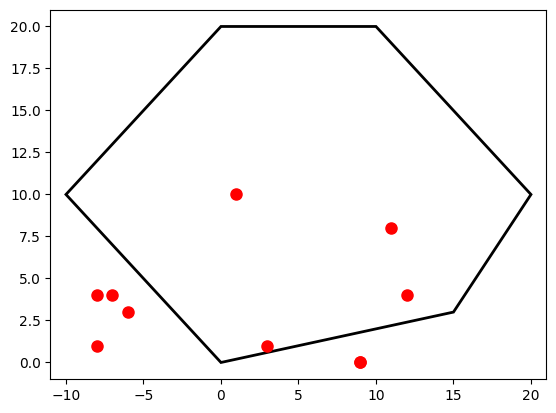

In [209]:
draw(points,dots)